<b>Exploring San Francisco Neighborhoods</b>

<p><b>Business Problem</b></p>
      <p> <b>Which neighborhood should I choose to live in San Francisco?</b></p>


<b>1. Problem Description and Background</b>

<p>San Francisco is the fourth populous city in the state of California located on the tip of a peninsula surrounded by the Pacific Ocean and San Francisco Bay. it is known for its iconic Golden Gate Bridge, cable cars, colorful Victorian houses and year round fog.</p>

<p>San Francisco is city of cinematic, ethnic, and historic neighborhoods with plethora of galleries, boutiques, most alluring hiking trails and parks, local and stylish restaurants with bustling night life. Each neighborhood carries its own charm and attract young, urban professionals and family people who are ethnically diverse with Irish, Russian, Hispanic, Italian, and Chinese roots.  Currently, San Francisco is a melting pot of diverse people which include families with babies and dogs, young and urban professionals, tech workers, blue-collar workers, retired people, affluent people, artists, hipsters, surfers, students and homeless people. </p>

<p>How do people from various backgrounds choose a neighborhood to live in San Francisco? One answer is based on their life style i.e activities and interests. To achieve this people choose to live closer to their interested venues. For this reason, exploring San Francisco neighborhoods to find various venues in each neighborhood is necessary to help make better decision of choosing a neighborhood to live in.</p>

<p>In this project, we focus mainly on three groups of people: Families with children and dog, young and urban professionals, and artists.</p>



<p><b>2. Data Description and Extraction</b></p>

<p>For the San Francisco neighborhood data, a Wikipedia page exists that has all the neighborhood information 
in a tabular form. First, the page is scraped using Beautiful Soup and it is wrangled, cleaned, and read into a pandas data frame.</p>

<p>Next, for each neighborhood the geo spacial coordinates are located using geo-codes. The neigborhood data is then merged with the geo spacial data.


<p><b>2.1 Import libraries</b></p>

In [2]:
#import libraries
import pandas as pd
import numpy as np

#Install beautifulsoup and html parser
!easy_install beautifulsoup4
!easy_install html5lib

# tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import folium to render map
!conda install -c conda-forge folium=0.5.0 --yes
import folium

# import k-means from clustering stage
from sklearn.cluster import KMeans

print("Imported!")

Searching for beautifulsoup4
Best match: beautifulsoup4 4.6.0
Adding beautifulsoup4 4.6.0 to easy-install.pth file

Using /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Processing dependencies for beautifulsoup4
Finished processing dependencies for beautifulsoup4
Searching for html5lib
Best match: html5lib 0.999999999
Adding html5lib 0.999999999 to easy-install.pth file

Using /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages
Processing dependencies for html5lib
Finished processing dependencies for html5lib
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py35_1 conda-forge
    branca:  0.3.1-py_0   conda-forge
    folium:  0.5.0-py_0   conda-forge
    vincent: 0.4.4-py_1   conda-forge

altair-2.2.2-p 100% |################################| Time: 0:00:00  39.51 MB/s
branca-0.3.1-p 100% |#################

<p><b>2.2 Scrape Wikipedia web page</b></p>

In [3]:
#Get page contents from the given URL
import requests
page = requests.get('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco')

<p><b>2.3 Wrangle, Clean, and Read Data</b></p>

In [4]:
#Using BeautifulSoup to extract the page
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [5]:
#Extract table from the page
html = list(soup.children)[2]
list(html.children)
body = list(html.children)[3]
body
sf_table = soup.find_all('table')[2]

#get borough list
list_th = sf_table.find_all("th")
list_th.pop(0) #pop out the title of the table from header list

#get neighborhood names list
list_td = sf_table.find_all("td")
list_td = list_td[:-1]   #delete extra data from the end of the list

records = []
i = 0
for td in list_td:
    neigh = []
    str = td.get_text().rstrip()
    if(str != ''):
        neigh = str.split('\n')
        for item in neigh:
            if(item != ''):
                record = []
                borough_name = list_th[i]
                record.append(borough_name.get_text().rstrip())
                record.append(item)
                records.append(record)
        i=i+1

#Create dataframe with table contents
header =['Borough', 'Neighborhood']
sf_df = pd.DataFrame(data=records)
sf_df.columns = ['Borough', 'Neighborhood']
print("There are 5 boroughs and {} neighborhoods in San Francisco".format(sf_df['Neighborhood'].count()))
print(sf_df.shape)
print(sf_df)



There are 5 boroughs and 60 neighborhoods in San Francisco
(60, 2)
              Borough           Neighborhood
0            Downtown              Chinatown
1            Downtown           Civic Center
2            Downtown     Financial District
3            Downtown         French Quarter
4            Downtown             Mid-Market
5            Downtown               Nob Hill
6            Downtown            North Beach
7            Downtown            Mission Bay
8            Downtown        South of Market
9            Downtown         Telegraph Hill
10           Downtown             Tenderloin
11           Downtown           Union Square
12  North of Downtown             Cow Hollow
13  North of Downtown      Fisherman's Wharf
14  North of Downtown        Marina District
15  North of Downtown        Pacific Heights
16  North of Downtown               Presidio
17  North of Downtown           Russian Hill
18  North of Downtown        Treasure Island
19  North of Downtown     Yerba B

<p><b>2.3 Locate Geo Spacial Coordinates for the neighborhoods</b></p>

In [6]:
#import Nominatim
from geopy.geocoders import Nominatim

latitude_list = []
longitude_list= []
records = sf_df['Neighborhood']

for item in records:
    #append city name to each neighborhood name
    address = item+', San Francisco'

    geolocator = Nominatim(user_agent="sf_explorer")
    location = geolocator.geocode(address)
    if(location):
        latitude_list.append(location.latitude)
        longitude_list.append(location.longitude)
    else:
        latitude_list.append('NA')
        longitude_list.append('NA')
        
#Make a copy of the sf_df dataframe
sf_df_geo = sf_df.copy(deep=True)
sf_df_geo['Latitude'] = latitude_list
sf_df_geo['Longitude'] = longitude_list
print(sf_df_geo)

              Borough           Neighborhood Latitude Longitude
0            Downtown              Chinatown  52.3752   4.90094
1            Downtown           Civic Center  37.7796  -122.417
2            Downtown     Financial District  37.7936  -122.399
3            Downtown         French Quarter       NA        NA
4            Downtown             Mid-Market       NA        NA
5            Downtown               Nob Hill  37.7933  -122.415
6            Downtown            North Beach  37.8012  -122.409
7            Downtown            Mission Bay  37.7708  -122.391
8            Downtown        South of Market  37.7809  -122.401
9            Downtown         Telegraph Hill  37.8027  -122.406
10           Downtown             Tenderloin  37.7842  -122.414
11           Downtown           Union Square  37.7879  -122.408
12  North of Downtown             Cow Hollow  37.7973  -122.436
13  North of Downtown      Fisherman's Wharf  37.8092  -122.417
14  North of Downtown        Marina Dist

<p><b>Observation: </b></p>
<p>Missing coordinations and wrong cordinations for few neighhoods.</p>
<p><b>Solution: </b><p>
<p>Download the sf_df_geo data frame into a cvs file and update the missing and error coordinates manually
and read the corrected cvs file into a data frame.</p>

In [7]:
# The code was removed by Watson Studio for sharing.

This cell is hidden as it contains credentials of the IBM Object Cloud.
Read the updated cvs file into sf_df_geocodes dataframe.


,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Alamo Square,37.776357,-122.434694
1,Anza Vista,37.780836,-122.443149
2,Bayview,37.728889,-122.392500
3,Bernal Heights,37.741001,-122.414214
4,Castro,37.760900,-122.435000


In [8]:
sf_df_geocodes.columns = ['Neighborhood', 'Latitude', 'Longitude']
sf_df_geocodes.head(5)

,Neighborhood,Latitude,Longitude
0,Alamo Square,37.776357,-122.434694
1,Anza Vista,37.780836,-122.443149
2,Bayview,37.728889,-122.392500
3,Bernal Heights,37.741001,-122.414214
4,Castro,37.760900,-122.435000


<p><b>2.4 Add geocodes to sf_df dataframe</b></p>

In [9]:
sf_df = sf_df.merge(sf_df_geocodes, how='inner')
sf_df.shape
print(sf_df)

              Borough        Neighborhood   Latitude   Longitude
0            Downtown           Chinatown  37.794100 -122.407800
1            Downtown        Civic Center  37.779594 -122.416794
2            Downtown  Financial District  37.793647 -122.398938
3            Downtown          Mid-Market  37.780500 -122.412500
4            Downtown            Nob Hill  37.793262 -122.415249
5            Downtown         North Beach  37.801175 -122.409002
6            Downtown         Mission Bay  37.770774 -122.391171
7            Downtown     South of Market  37.780893 -122.400952
8            Downtown      Telegraph Hill  37.802730 -122.405851
9            Downtown          Tenderloin  37.784249 -122.413993
10           Downtown        Union Square  37.787936 -122.407517
11  North of Downtown          Cow Hollow  37.797262 -122.436248
12  North of Downtown   Fisherman's Wharf  37.809167 -122.416599
13  North of Downtown     Marina District  37.802984 -122.437472
14  North of Downtown    

<p><b>Map of San Francisco Neighborhoods</b></p>

In [10]:
address = 'San Francisco, California'

geolocator = Nominatim(user_agent="sf_city_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco City are 37.7792808, -122.4192363.


In [11]:
#latitude = 37.7749
#longitude = -122.4194
# create map of New York using latitude and longitude values
map_sf = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(sf_df['Latitude'], sf_df['Longitude'], sf_df['Borough'], sf_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf)  
    
map_sf

<p><b>2.5 Use Foursquare API to get list of venues in each San Francisco neighborhood</b></p>

In [12]:
# The code was removed by Watson Studio for sharing.

Initialized Foursquare credentials: client_id, client_secret, and version in this cell.


In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=250, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
#Get venues in each neighborhood of San Francisco
sf_venues = getNearbyVenues(names=sf_df['Neighborhood'],
                                   latitudes=sf_df['Latitude'],
                                   longitudes=sf_df['Longitude']
                                  )

print(sf_venues.shape)
print(sf_venues.head(5))

(1218, 7)
  Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Chinatown                37.7941               -122.4078   
1    Chinatown                37.7941               -122.4078   
2    Chinatown                37.7941               -122.4078   
3    Chinatown                37.7941               -122.4078   
4    Chinatown                37.7941               -122.4078   

                               Venue  Venue Latitude  Venue Longitude  \
0            Red Blossom Tea Company       37.794643      -122.406379   
1                       Mister Jiu's       37.793790      -122.406615   
2                      STEAP TEA BAR       37.793359      -122.406573   
3  Golden Star Vietnamese Restaurant       37.794526      -122.405603   
4                     Eastern Bakery       37.793776      -122.406178   

          Venue Category  
0               Tea Room  
1     Chinese Restaurant  
2        Bubble Tea Shop  
3  Vietnamese Restaurant  
4                 Bakery 

In [16]:
#Plotting venues using their geo spacial coordinates on San Francisco map
latitude = 37.7749
longitude = -122.4194
# create map of New York using latitude and longitude values
map_sf_venues = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(sf_venues['Venue Latitude'], sf_venues['Venue Longitude'], sf_venues['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='red',
        fill=True,
        fill_color='#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sf_venues)  
    
map_sf_venues

<p><b>Count of venues in each neighborhood of San Francisco and sort them in ascending order</b></p>

In [17]:
sf_venues_count_sorted = sf_venues.groupby('Neighborhood').count()
sf_venues_count_sorted.sort_values(['Venue Latitude'], ascending=False)

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Union Square,100,100,100,100,100,100
Hayes Valley,88,88,88,88,88,88
Castro,68,68,68,68,68,68
Mission District,65,65,65,65,65,65
Japantown,60,60,60,60,60,60
Haight-Ashbury,54,54,54,54,54,54
North Beach,50,50,50,50,50,50
Financial District,50,50,50,50,50,50
Noe Valley,44,44,44,44,44,44


In [18]:
print("Number of unique categories identified in San Francisco neighborhood are {}".format(len(sf_venues['Venue Category'].unique()))) 

Number of unique categories identified in San Francisco neighborhood are 246


In [19]:
print("Number of unique venues identified in San Francisco neighborhood are {}".format(len(sf_venues['Venue'].unique()))) 

Number of unique venues identified in San Francisco neighborhood are 1155


<p><b>3. Data Analysis</b></p>

<p><b>3.1 Data Set Creation</p></b>

<p><b>Use one-hot encoding to tranform categorical values into binary values for statistical analysis.</b></p>

In [20]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

print(sf_onehot.shape)
sf_onehot.head()

(1218, 247)


,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Chinatown,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<p><b>Group neighborhoods and by taking the mean of the frequency of occurrence of each category. This data set is used for analysis.</p></b>

In [21]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
print(sf_grouped.shape)
sf_grouped

(56, 247)


,Neighborhood,ATM,Acai House,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Arcade,...,Udon Restaurant,Vegetarian / Vegan Restaurant,Veterinarian,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Alamo Square,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
1,Anza Vista,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
2,Bernal Heights,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.058824
3,Castro,0.000000,0.00,0.000000,0.014706,0.000000,0.00000,0.029412,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.029412,0.014706,0.00,0.000000,0.014706
4,Cathedral Hill,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,Chinatown,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.037037,0.000000,0.000000,...,0.000000,0.037037,0.0000,0.000000,0.037037,0.000000,0.000000,0.00,0.000000,0.000000
6,Civic Center,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.037037,0.000000,0.000000,...,0.000000,0.074074,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,Cole Valley,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.090909,0.000000,0.00,0.000000,0.000000
8,Corona Heights,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
9,Cow Hollow,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.024390,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.048780,0.024390,0.00,0.000000,0.000000


<p><b>3.2 Statistical Analysis Methods</b></p>

<p><b>3.2.1 Agglomerative Heirarchical Clustering</b></p>

<p><b>3.2.1.1 Target Audience Group 1: Families with children and dog</b></p>

<p>Feature set for the target audience are created by intitually selecting the venue categories that they are interested in from the list of venue categories.</p>

In [43]:
featureset_aud1 = sf_grouped[['Park', 'Garden',  'Trail', 'Library', 'Dance Studio', 'Music School','Skating Rink', 'Athletics & Sports', 'Soccer Field', 'Mini Golf','Bookstore','Church', 'Veterinarian','Pet Store','Shopping Mall','Supermarket' ]]

<p>Normalize the values using MinMaxScaler</p>

In [44]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_aud1.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_aud1_mtx = min_max_scaler.fit_transform(x)
feature_aud1_mtx [0:5]

array([[ 0.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.11764706,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.10294118,  0.        ,  0.        ,  0.47058824,  0.        ,
         0.10294118],
       [ 0.        ,  0.        ,  0

In [45]:
#Compute distance matrix using the Euclidean distance
import scipy
leng = feature_aud1_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_aud1_mtx[i], feature_aud1_mtx[j])

In [46]:
#Specify the linkage as 'complete' to use in each iteration
import pylab
import scipy.cluster.hierarchy

Z_aud1 = scipy.cluster.hierarchy.linkage(D, 'complete')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


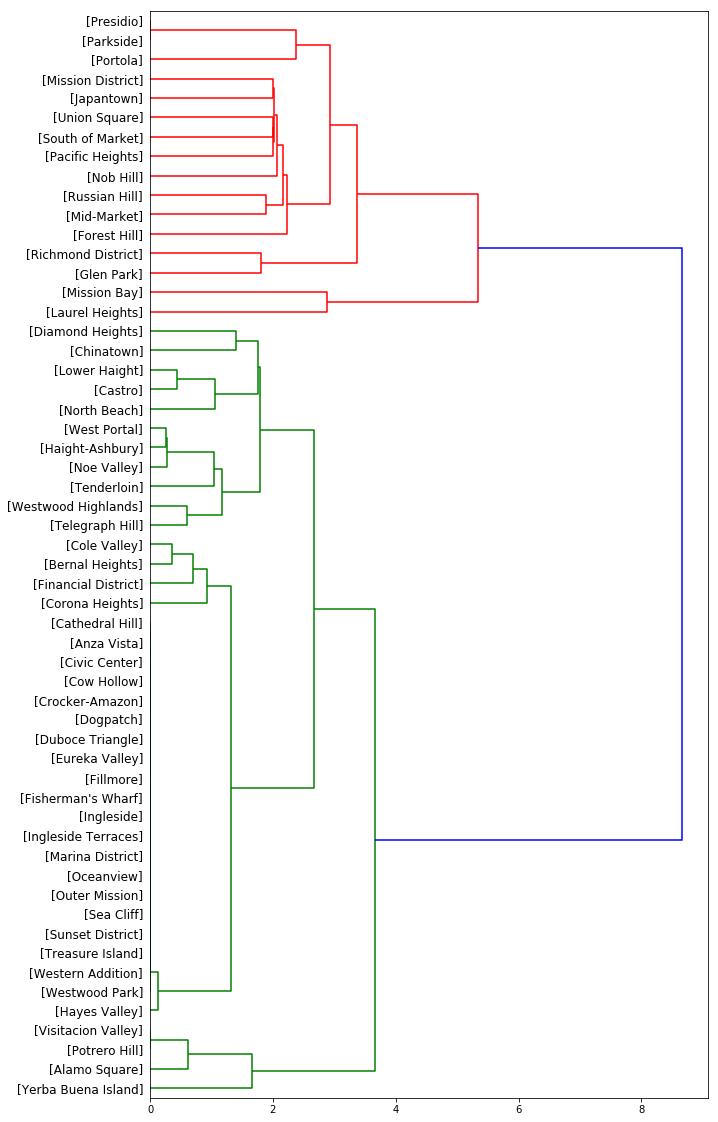

In [131]:
fig = pylab.figure(figsize=(10,20))
def llf(id):
    return '[%s]' % (sf_grouped['Neighborhood'][id])
    #return '[%s %s %s %s %s %s]' % (sf_grouped['Neighborhood'][id], sf_grouped['Park'][id], sf_grouped['Garden'][id], sf_grouped['Library'][id], sf_grouped['Trail'][id], sf_grouped['Veterinarian'][id]) 
    
dendro = scipy.cluster.hierarchy.dendrogram(Z_aud1,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [59]:
from scipy.cluster.hierarchy import ward, fcluster
assignments = fcluster(scipy.cluster.hierarchy.linkage(Z_aud1, method='complete'),4,'distance')

print(assignments)

cluster_output = pd.DataFrame({'Neighborhood':Z_aud1['Neighborhood'][id].tolist() , 'cluster':assignments})
print(cluster_output)

[40 13 36 35 35 32 32 33 33 34 27 27 28 26 26 19 19 20 18 18 41 29 45 24 13
 15 38 37 30 31 16 24 11 12 14 17  9 10 43 44 39 21 42  4 22  5 23 25  1 42
  6  8  2  7  3]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<p><b>3.2.1.2 Target Audience Group 2: Young and Urban professionals</b></p>

In [60]:
#Create feature set for dudience group 2
featureset_aud2 = sf_grouped[['Light Rail Station', 'Bus Stop', 'Gym / Fitness Center', 'Gym', 'Pilates Studio', 'Yoga Studio', 'ATM' ,'Flower Shop', 'Boutique', 'Electronics Store' ,'Paper / Office Supplies Store', 'Comic Shop', 'Beer Bar', 'Cocktail Bar','Karaoke Bar' ,'Jazz Club', 'Nightclub']]

In [61]:
from sklearn.preprocessing import MinMaxScaler
x = featureset_aud2.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_aud2_mtx = min_max_scaler.fit_transform(x)
feature_aud2_mtx [0:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.11764706,  0.        ,  1.        ,  0.        ,
         0.41176471,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.10294118,  0.        ,  0.47058824,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        

In [62]:
#Create similarity matrix using Euclidean Distance
import scipy
leng = feature_aud2_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_aud2_mtx[i], feature_aud2_mtx[j])

In [63]:
#Specify linkage as complete, i.e maximum distance between two points in the new cluster and old cluster forest
import pylab
import scipy.cluster.hierarchy

Z_aud2 = scipy.cluster.hierarchy.linkage(D, 'complete')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


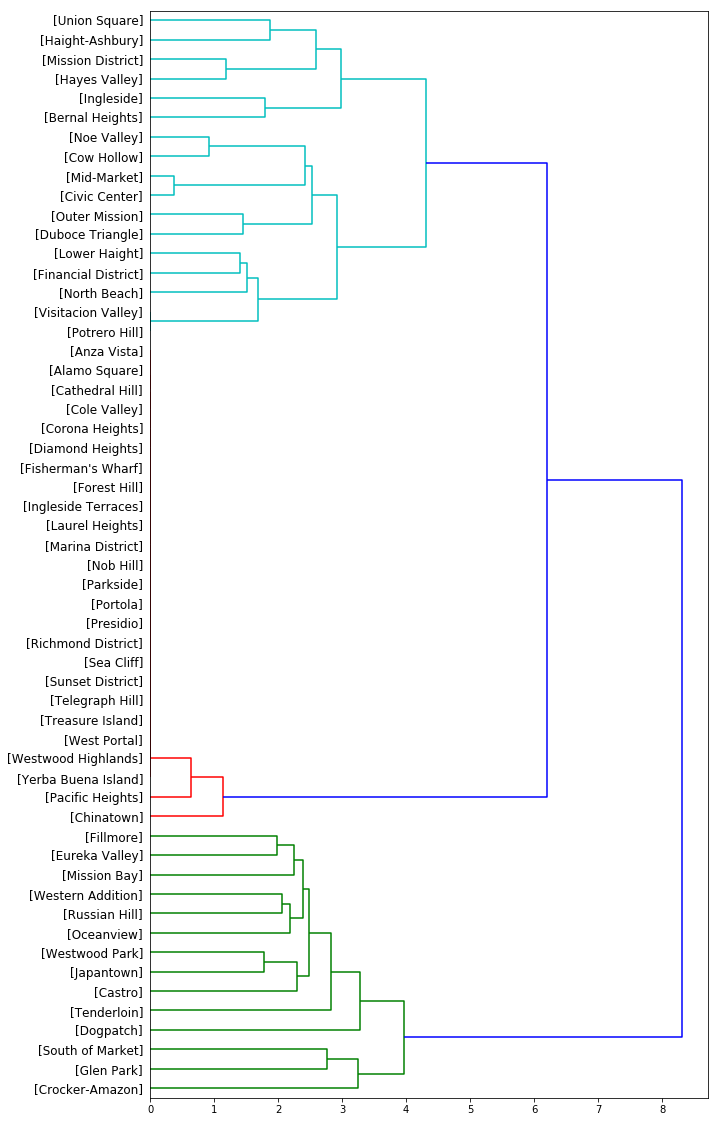

In [64]:
fig = pylab.figure(figsize=(10,20))
def llf(id):
    return '[%s]' % (sf_grouped['Neighborhood'][id])
    
dendro = scipy.cluster.hierarchy.dendrogram(Z_aud2,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<p><b>3.2.1.3 Target Audience Group 3: Artists</b>

In [65]:
#Create feature set for target audence group 3
featureset_aud3 = sf_grouped[['History Museum', 'Art Museum', 'Art Gallery', 'Public Art', 'Sculpture Garden', 'Antique Shop' , 'Monument / Landmark', 'Outdoor Sculpture','Historic Site','Harbor / Marina', 'Beach', 'Mountain', 'Hobby Shop' ,'Arts & Crafts Store']]

In [66]:
#Normalize the values using min max scaler
from sklearn.preprocessing import MinMaxScaler
x = featureset_aud3.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_aud3_mtx = min_max_scaler.fit_transform(x)
feature_aud3_mtx [0:5]

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.32352941,  0.        ,  0.30882353,  0.        ,  0.        ,
         0.        ,  0.14705882,  0.        ,  0.04411765,  0.        ,
         0.        ,  0.        ,  0.        ,  0.05882353],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.  

In [67]:
#Compute similarity matrix using Eucledean Distance
import scipy
leng = feature_aud3_mtx.shape[0]
D = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        D[i,j] = scipy.spatial.distance.euclidean(feature_aud3_mtx[i], feature_aud3_mtx[j])

In [68]:
#Specify linkage as complete
import pylab
import scipy.cluster.hierarchy

Z_aud3 = scipy.cluster.hierarchy.linkage(D, 'complete')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:5: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


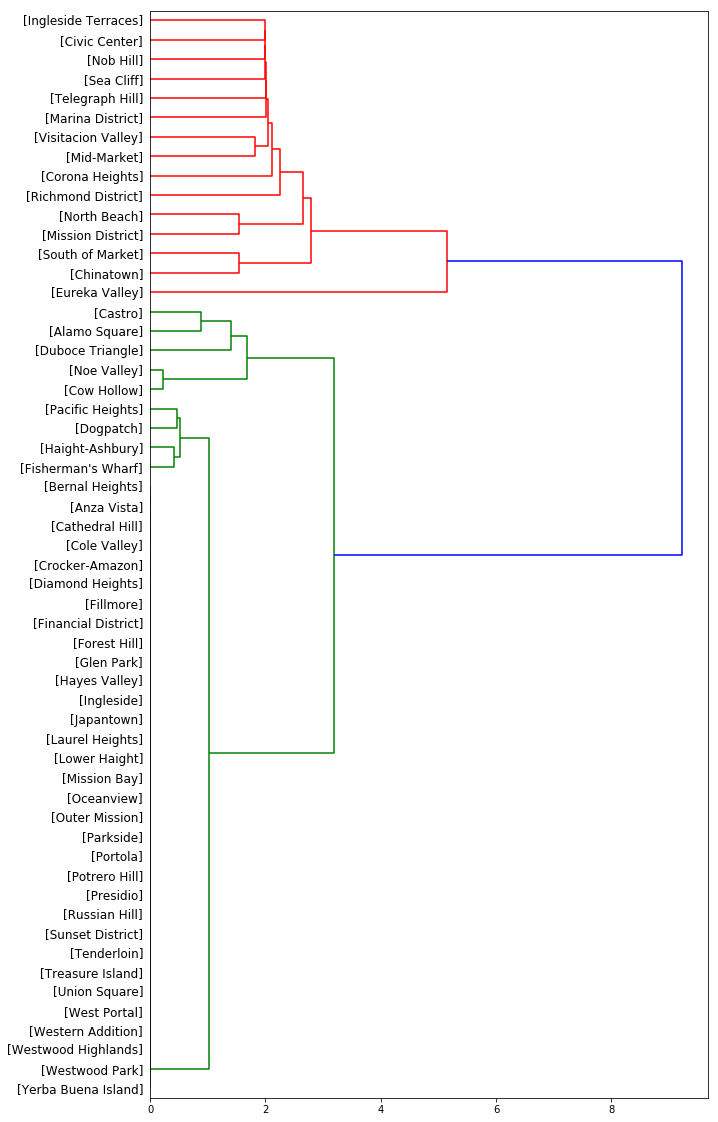

In [72]:
fig = pylab.figure(figsize=(10,20))
def llf(id):
    return '[%s]' % (sf_grouped['Neighborhood'][id]) 
    
dendro = scipy.cluster.hierarchy.dendrogram(Z_aud3,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

<p><b>3.2.2 Density Based Clustering</b></p>

<p>DBSCAN - Density Based Scanning of Applications with Noise clustering method is used to locate areas of neighborhoods with dense venues. That means neighborhoods with most venues are grouped together. In this method, using the spacial coordinates of the venues the data points are plotted.<p>

In [79]:
#Import libraries
from sklearn.cluster import DBSCAN 
import matplotlib.pyplot as plt 
%matplotlib inline
!conda install basemap
from mpl_toolkits.basemap import Basemap
from pylab import rcParams

Fetching package metadata ...........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
basemap                   1.0.7               np113py35_0  


In [80]:
#Extract the venue latitude and longitudes from sf_venues dataframe
pdf = sf_venues.copy(deep=True)
vlon = pdf.iloc[:,5].values
vlat = pdf.iloc[:,4].values
print(vlon.shape)
print(vlon.shape)

(1218,)
(1218,)


<p><b>DBSCAN Clustering based on venue corordinates (Lat, Long)</b></p>

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
# my_map.drawmapboundary()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To collect data based on stations        

xs,ys = my_map(np.asarray(pdf.Long), np.asarray(pdf.Lat))
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

#Visualization1
for index,row in pdf.iterrows():
#   x,y = my_map(row.Long, row.Lat)
   my_map.plot(row.xm, row.ym,markerfacecolor =([1,0,0]),  marker='o', markersize= 5, alpha = 0.75)
#plt.text(x,y,stn)
plt.show()


In [81]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler

sklearn.utils.check_random_state(1000)

xs,ys = my_map(vlon, vlat)
                          
pdf['xm']= xs.tolist()
pdf['ym'] =ys.tolist()

Clus_dataSet = pdf[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.25, min_samples=10).fit(Clus_dataSet)  #0.15, 10
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# Clusters Ids
print(pdf['Clus_Db'].unique())


[ 0  1  2  3 -1  4  5  6  7  8  9 10 11 12 13]


<p> Here Cluster -1 is an outlier. </p>

<p><b>Visualization based on location of the Venues</b></p>

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: Ma

0      Cluster 0, Venue: Red Blossom Tea Company, Cat...
1      Cluster 0, Venue: Mister Jiu's, Category: Chin...
2      Cluster 0, Venue: STEAP TEA BAR, Category: Bub...
3      Cluster 0, Venue: Golden Star Vietnamese Resta...
4      Cluster 0, Venue: Eastern Bakery, Category: Ba...
5      Cluster 0, Venue: Good Mong Kok Bakery, Catego...
6      Cluster 0, Venue: Fairmont Hotel Crown Room, C...
7      Cluster 0, Venue: Old Saint Mary's Cathedral (...
8      Cluster 0, Venue: YMCA, Category: Gym / Fitnes...
9      Cluster 0, Venue: The AA Bakery & Cafe, Catego...
10     Cluster 0, Venue: Li Po Cocktail Lounge, Categ...
11     Cluster 0, Venue: Dragon Papa, Category: Desse...
12     Cluster 0, Venue: Golden Gate Fortune Cookie F...
13     Cluster 0, Venue: Napoleon Super Bakery, Categ...
14     Cluster 0, Venue: Golia Beauty Center, Categor...
15     Cluster 0, Venue: Hong Kong Clay Pot Restauran...
16     Cluster 0, Venue: Chinese Historical Society o...
17     Cluster 0, Venue: Parall

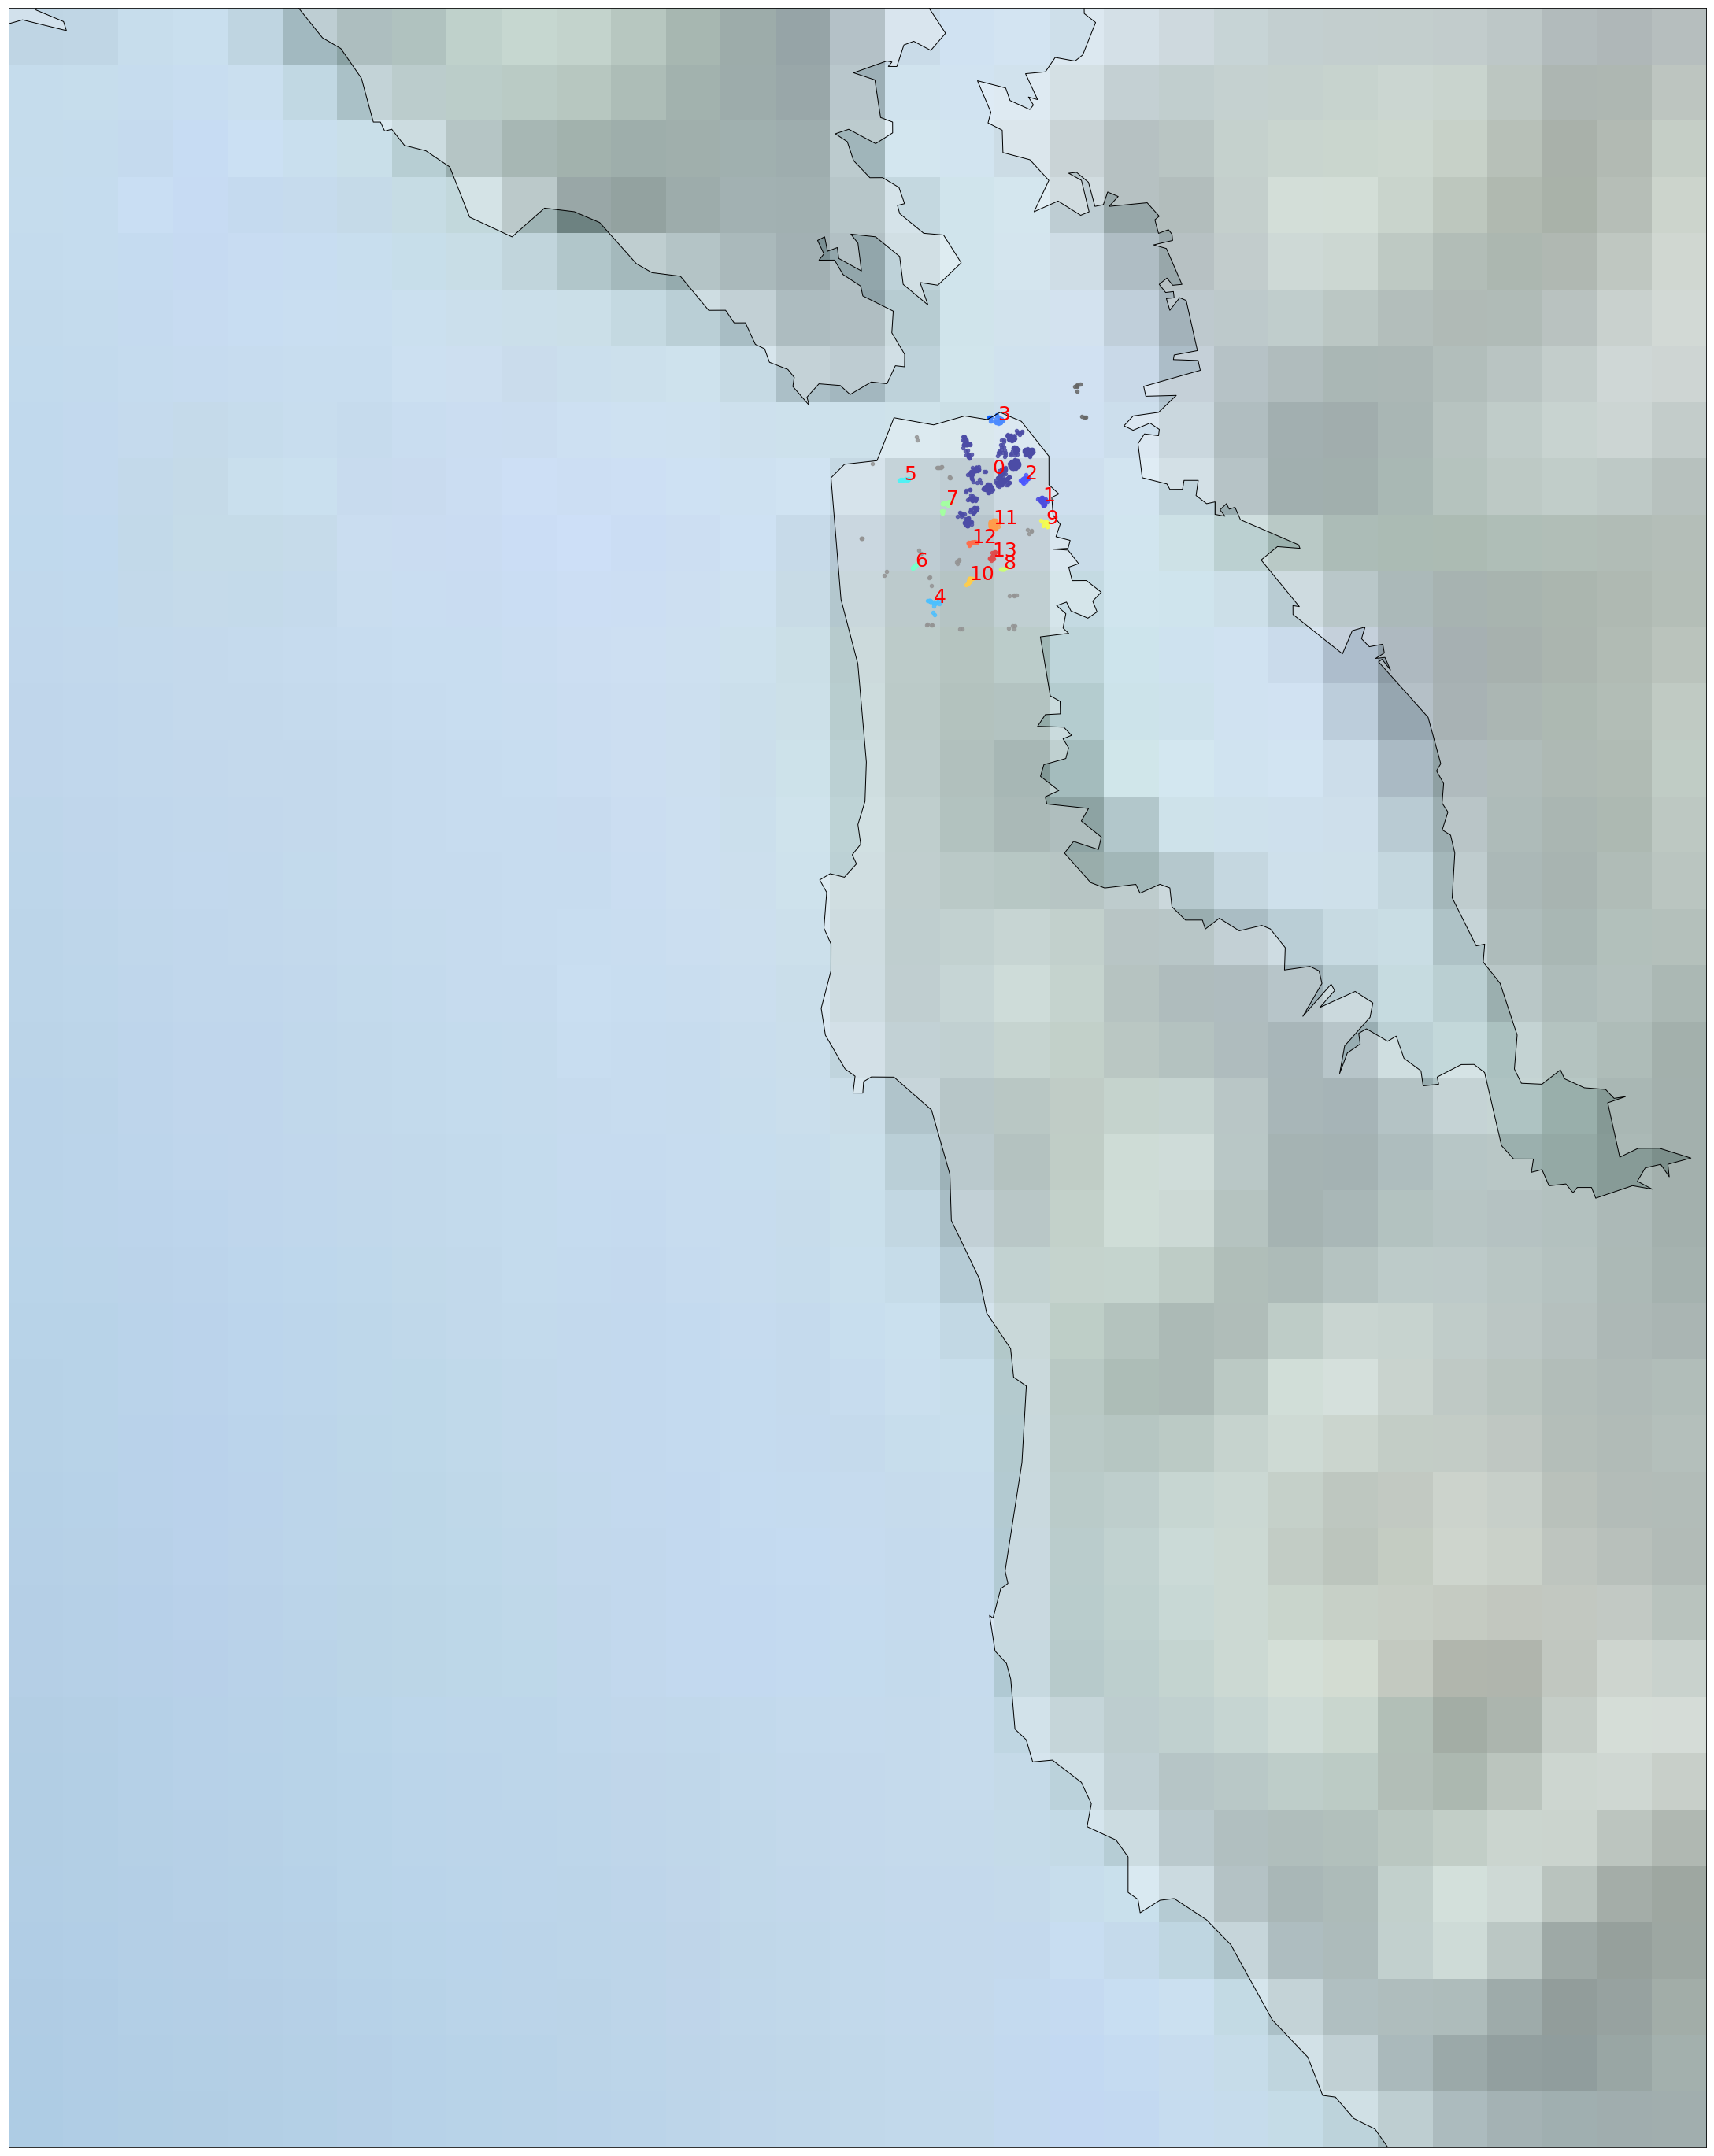

In [94]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (40,50)

llon=-123
ulon=-122
llat=37
ulat=38

my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 10000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()

# To create a color map
colors_list = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

#Visualization
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors_list[np.int(clust_number)])
    clust_set = pdf[pdf.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 20, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        
        plt.text(cenx,ceny,clust_number, fontsize=25, color='red',)
        print ("Cluster {}".format(clust_number)+', Venue: '+ clust_set['Venue']+ ', Category: '+ clust_set['Venue Category'])

<p><b>3.2.3 K-Means Clustering</b></p>

<p>In K-means clustering, the data is group based on similarity. Here the number of clusters have to de defined. The data set used in sf_grouped, which has grouped neighborhoods with the mean of the frequency of occurrence of each category. The top ten most common venues in each neighborhood are identified. </p>

<p>3.2.3.1 Data set creation</p> 

<p><b>Top 10 common venues in each neighborhood are obtained. </b></p>

In [98]:
#Function to sort values in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [99]:
#Get top 10 common venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Alamo Square,Dog Run,Sandwich Place,Food Truck,Historic Site,Park,Farmers Market,Ethiopian Restaurant,Event Space,Farm,Yoga Studio
1,Anza Vista,Health & Beauty Service,Coffee Shop,Sandwich Place,Donut Shop,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Flower Shop
2,Bernal Heights,Bakery,New American Restaurant,Coffee Shop,Mexican Restaurant,Bus Stop,Seafood Restaurant,Gym,Asian Restaurant,Park,Yoga Studio
3,Castro,Gay Bar,Coffee Shop,Thai Restaurant,Pet Store,American Restaurant,Cosmetics Shop,New American Restaurant,Clothing Store,Wine Bar,Playground
4,Cathedral Hill,Cupcake Shop,Flea Market,Yoga Studio,Ethiopian Restaurant,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


<p><b>3.2.3.2 Data Analysis</b></p>

<p>Find the best K in K means</p>

In [88]:
sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)
Sum_of_squared_distances = []
K = range(1,35)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(sf_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
print(Sum_of_squared_distances)

[10.268693601187579, 9.164630193805948, 8.1708532336059694, 7.3475252105742417, 6.9607814848869456, 6.3856305495880896, 5.9952088857818318, 5.57696192238501, 5.393255837148045, 4.8447293492907484, 4.7304437324071378, 4.3301475106740401, 3.9847282219079654, 3.7575821050355813, 3.4687931014824489, 3.2446900800515799, 3.0418736207032202, 2.7910567108577933, 2.5899265391009254, 2.3838153653836018, 2.2149188270473212, 2.0265292269791089, 1.9375798029777425, 1.7963809882892621, 1.5794275226840462, 1.474233945189525, 1.396737764706506, 1.3087050667097997, 1.2448824239487193, 1.1211170431342938, 1.0514819989447528, 0.98035999631660742, 0.90479295770956858, 0.83533159793151379]


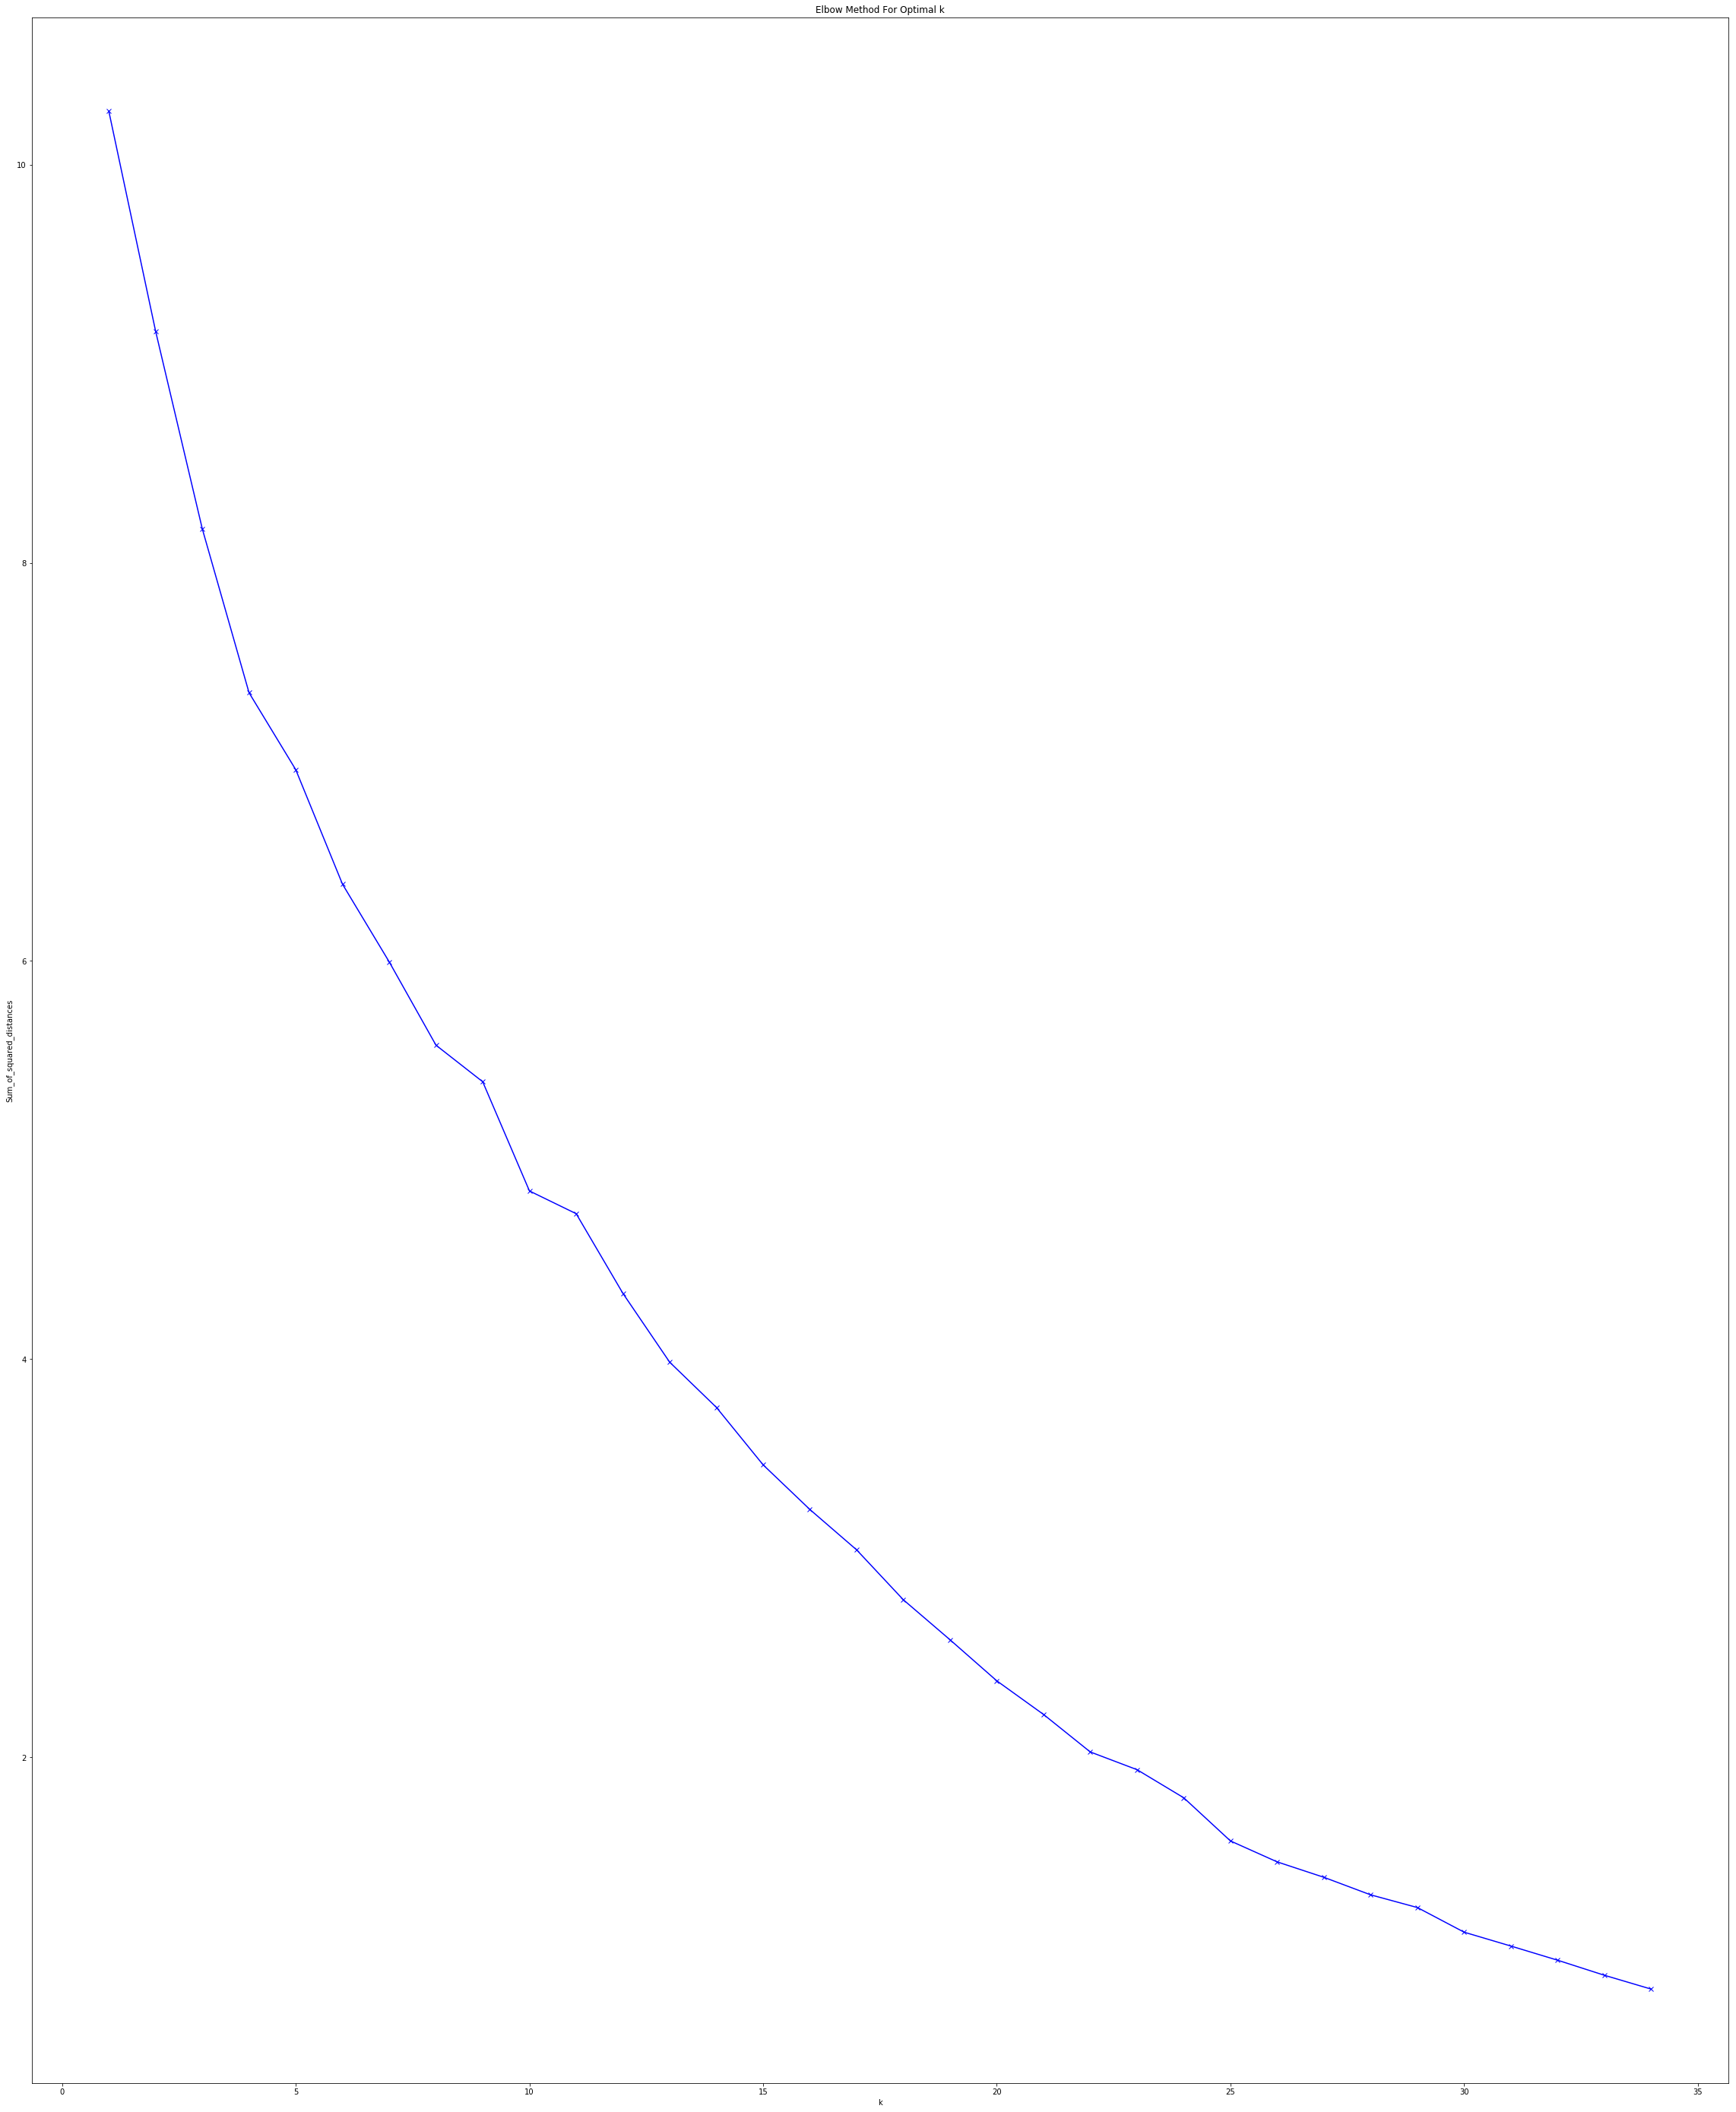

In [89]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<p>Run k-Means to cluster the neighborhoods into 10 clusters.</p>

In [132]:
# set number of clusters
kclusters = 10

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_)
print(sf_grouped_clustering.shape)

[1 1 1 1 4 1 1 1 1 1 3 2 1 1 1 1 1 1 2 1 1 1 1 5 1 1 1 1 1 1 1 1 1 1 6 1 1
 0 9 0 7 1 1 8 1 1 1 1 1 1 0 1 1 1 1 0]
(56, 246)


In [133]:
# add clustering labels
neighborhoods_venues_sorted = neighborhoods_venues_sorted.drop(['Cluster Labels'], axis=1)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sf_merged = sf_df

# merge sf_grouped with sf_data to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sf_merged.head() # check the last columns!
print(sf_merged[['Neighborhood', 'Cluster Labels']])

          Neighborhood  Cluster Labels
0            Chinatown               1
1         Civic Center               1
2   Financial District               1
3           Mid-Market               1
4             Nob Hill               1
5          North Beach               1
6          Mission Bay               1
7      South of Market               1
8       Telegraph Hill               1
9           Tenderloin               1
10        Union Square               1
11          Cow Hollow               1
12   Fisherman's Wharf               1
13     Marina District               1
14     Pacific Heights               1
15            Presidio               7
16        Russian Hill               1
17     Treasure Island               1
18  Yerba Buena Island               0
19         Forest Hill               2
20           Ingleside               1
21  Ingleside Terraces               5
22           Oceanview               6
23            Parkside               0
24   Richmond District   

<b><p>Examining each cluster</b></p>

<p>Finding the size of the clusters</p>

In [134]:
sf_merged.groupby('Cluster Labels').count()

,Borough,Neighborhood,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Cluster Labels,,,,,,,,,,,,,,
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,43,43,43,43,43,43,43,43,43,43,43,43,43,43
2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [135]:
sf_merged.loc[sf_merged['Cluster Labels'] == 0, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
18,Yerba Buena Island,Island,Park,Tunnel,Yoga Studio,Flower Shop,Event Space,Farm,Farmers Market,Flea Market,Food Stand
23,Parkside,Park,Dog Run,Yoga Studio,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand
54,Potrero Hill,Playground,Park,Bus Stop,Hill,Electronics Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand
55,Visitacion Valley,Bus Stop,Baseball Field,Chinese Restaurant,Park,Yoga Studio,Flea Market,Farm,Farmers Market,Flower Shop,Ethiopian Restaurant


In [136]:
sf_merged.loc[sf_merged['Cluster Labels'] == 1, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Chinatown,Bakery,Chinese Restaurant,Dim Sum Restaurant,Dive Bar,Park,Gym / Fitness Center,Tea Room,Massage Studio,Church,History Museum
1,Civic Center,Coffee Shop,Performing Arts Venue,Vegetarian / Vegan Restaurant,Café,Diner,Donut Shop,Music Venue,Sushi Restaurant,Korean Restaurant,Bank
2,Financial District,Coffee Shop,Sandwich Place,Café,Food Truck,Gym / Fitness Center,Deli / Bodega,Salad Place,Italian Restaurant,Comedy Club,Candy Store
3,Mid-Market,Coffee Shop,Mexican Restaurant,Theater,Art Gallery,Music Store,Restaurant,French Restaurant,Thai Restaurant,Farmers Market,Public Art
4,Nob Hill,Grocery Store,Convenience Store,Liquor Store,Deli / Bodega,Church,Sculpture Garden,French Restaurant,Sushi Restaurant,Cosmetics Shop,Italian Restaurant
5,North Beach,Italian Restaurant,Bakery,Pizza Place,Café,Coffee Shop,Theater,Pet Store,Breakfast Spot,Sicilian Restaurant,Seafood Restaurant
6,Mission Bay,Food Truck,Street Food Gathering,Coffee Shop,Gym / Fitness Center,Taco Place,Performing Arts Venue,Soccer Field,Shipping Store,Sandwich Place,Playground
7,South of Market,Skating Rink,History Museum,New American Restaurant,Electronics Store,Grocery Store,Donut Shop,Gym,Bar,Gym / Fitness Center,Bakery
8,Telegraph Hill,Trail,Monument / Landmark,Deli / Bodega,Spa,Salon / Barbershop,Gourmet Shop,Park,Café,Food Stand,Flower Shop
9,Tenderloin,Indian Restaurant,Speakeasy,Vietnamese Restaurant,Recording Studio,Bakery,Middle Eastern Restaurant,North Indian Restaurant,Beer Bar,Tiki Bar,Museum


In [137]:
sf_merged.loc[sf_merged['Cluster Labels'] == 2, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Forest Hill,Trail,Yoga Studio,Donut Shop,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Flower Shop
46,Diamond Heights,Trail,Playground,Baseball Field,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [138]:
sf_merged.loc[sf_merged['Cluster Labels'] == 3, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,Crocker-Amazon,Light Rail Station,Bus Stop,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Flower Shop


In [139]:
sf_merged.loc[sf_merged['Cluster Labels'] == 4, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Cathedral Hill,Cupcake Shop,Flea Market,Yoga Studio,Ethiopian Restaurant,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck


In [140]:
sf_merged.loc[sf_merged['Cluster Labels'] == 5, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Ingleside Terraces,Playground,Mountain,Yoga Studio,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [141]:
sf_merged.loc[sf_merged['Cluster Labels'] == 6, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Oceanview,Light Rail Station,Grocery Store,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Flower Shop


In [143]:
sf_merged.loc[sf_merged['Cluster Labels'] == 7, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Presidio,Stables,Park,Yoga Studio,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [154]:
sf_merged.loc[sf_merged['Cluster Labels'] == 7, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Presidio,Stables,Park,Yoga Studio,Dog Run,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand,Food & Drink Shop,Flower Shop


In [144]:
sf_merged.loc[sf_merged['Cluster Labels'] == 8, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Sea Cliff,Beach,Yoga Studio,Ethiopian Restaurant,Garden,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


In [145]:
sf_merged.loc[sf_merged['Cluster Labels'] == 9, sf_merged.columns[[1] + list(range(5, sf_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
53,Portola,Bus Station,Library,Park,Electronics Store,Furniture / Home Store,Frozen Yogurt Shop,Fried Chicken Joint,French Restaurant,Food Truck,Food Stand


<p>Visualizing the clusters</p>

In [147]:
import math
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [mpl.colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    if(math.isnan(cluster)):
       break
    else:
        cluster = int(cluster)
        i = cluster-1
    label = '{}, {}'.format(poi, cluster)
    label = folium.Popup(label, parse_html=True)
    #label = folium.Popup(poi + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[i],
        fill=True,
        fill_color=rainbow[i],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters